In [1]:
## This dataset basically consists of crop yield and the factors affecting it.
## Originally, extracted from world bank data and was published in Kaggle
## In this personal project I will be performing EDA, and implement machine learning
## like Random Forest and Gradient Boosting Machine's LightGBM to predict crop yield

In [6]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [7]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler



In [10]:
#reading the datafile and storing it in dataframe df
df = pd.read_csv("C:/Users/Acer/Downloads/archive (1)/yield_df.csv")
df.head()

Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37

In [12]:
#deleting the unnecessary column
df = df.drop(df.columns[0], axis=1)

In [14]:
#observing the updated dataset
df.head()

Area         Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0  Albania        Maize  1990        36613                         1485.0   
1  Albania     Potatoes  1990        66667                         1485.0   
2  Albania  Rice, paddy  1990        23333                         1485.0   
3  Albania      Sorghum  1990        12500                         1485.0   
4  Albania     Soybeans  1990         7000                         1485.0   

   pesticides_tonnes  avg_temp  
0              121.0     16.37  
1              121.0     16.37  
2              121.0     16.37  
3              121.0     16.37  
4              121.0     16.37

In [16]:
#performing exploratory data analysis see figure out patterns in the dataset
#checking the data types and their properties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [18]:
#checking the summary statistics of each variable
df.describe()

Year    hg/ha_yield  average_rain_fall_mm_per_year  \
count  28242.000000   28242.000000                    28242.00000   
mean    2001.544296   77053.332094                     1149.05598   
std        7.051905   84956.612897                      709.81215   
min     1990.000000      50.000000                       51.00000   
25%     1995.000000   19919.250000                      593.00000   
50%     2001.000000   38295.000000                     1083.00000   
75%     2008.000000  104676.750000                     1668.00000   
max     2013.000000  501412.000000                     3240.00000   

       pesticides_tonnes      avg_temp  
count       28242.000000  28242.000000  
mean        37076.909344     20.542627  
std         59958.784665      6.312051  
min             0.040000      1.300000  
25%          1702.000000     16.702500  
50%         17529.440000     21.510000  
75%         48687.880000     26.000000  
max        367778.000000     30.650000

In [20]:
#Checking for missing values
#no missing values found
df.replace('Missing',np.nan,inplace=True)
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [22]:
#renaming target variable
df['yield'] = df['hg/ha_yield']
df.drop('hg/ha_yield',axis=1,inplace=True)

In [24]:
df.head()

Area         Item  Year  average_rain_fall_mm_per_year  \
0  Albania        Maize  1990                         1485.0   
1  Albania     Potatoes  1990                         1485.0   
2  Albania  Rice, paddy  1990                         1485.0   
3  Albania      Sorghum  1990                         1485.0   
4  Albania     Soybeans  1990                         1485.0   

   pesticides_tonnes  avg_temp  yield  
0              121.0     16.37  36613  
1              121.0     16.37  66667  
2              121.0     16.37  23333  
3              121.0     16.37  12500  
4              121.0     16.37   7000

C:\Users\Acer\AppData\Local\Temp\ipykernel_108588\327584046.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yield_top_10_region.index, y=yield_top_10_region.values, palette='coolwarm')


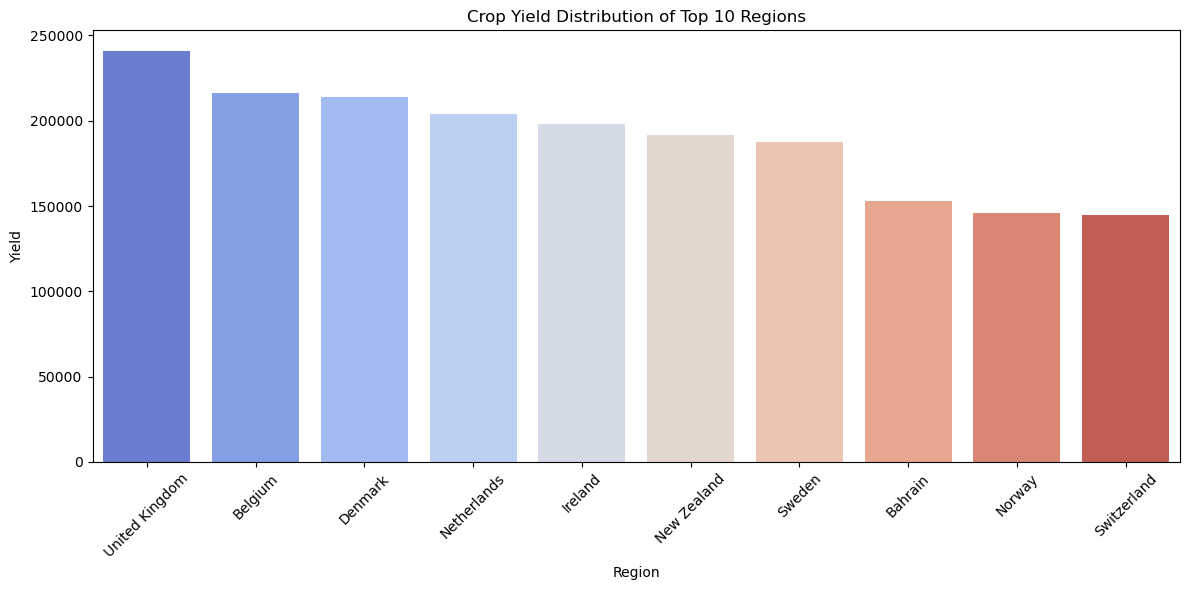

In [34]:
#observe crop yield distribution of top 10 regions
# Group by 'Area', calculate mean yield, sort descending, take top 10
yield_top_10_region = df.groupby('Area')['yield'].mean().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=yield_top_10_region.index, y=yield_top_10_region.values, palette='coolwarm')
plt.title('Crop Yield Distribution of Top 10 Regions')
plt.xlabel('Region')
plt.ylabel('Yield')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_108588\420254001.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yield_top_10_crops.index,y=yield_top_10_crops.values,palette='coolwarm')


Text(0, 0.5, 'yield')

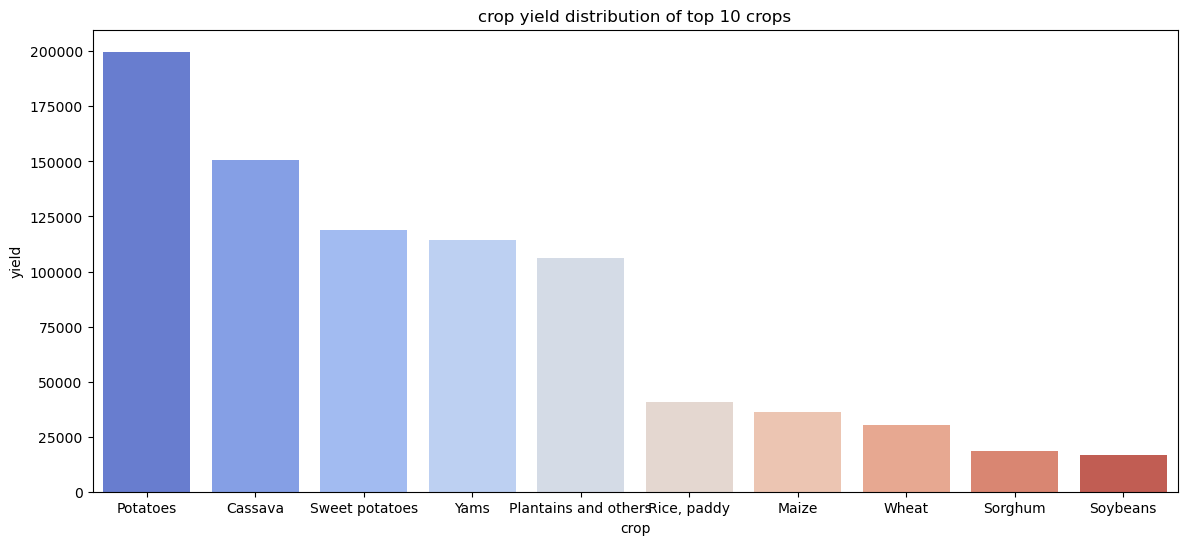

In [38]:
#observe crop yield distribution of top 10 crops
yield_top_10_crops = df.groupby('Item')['yield'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(14,6))
sns.barplot(x=yield_top_10_crops.index,y=yield_top_10_crops.values,palette='coolwarm')
plt.title('crop yield distribution of top 10 crops')
plt.xlabel('crop')
plt.ylabel('yield')

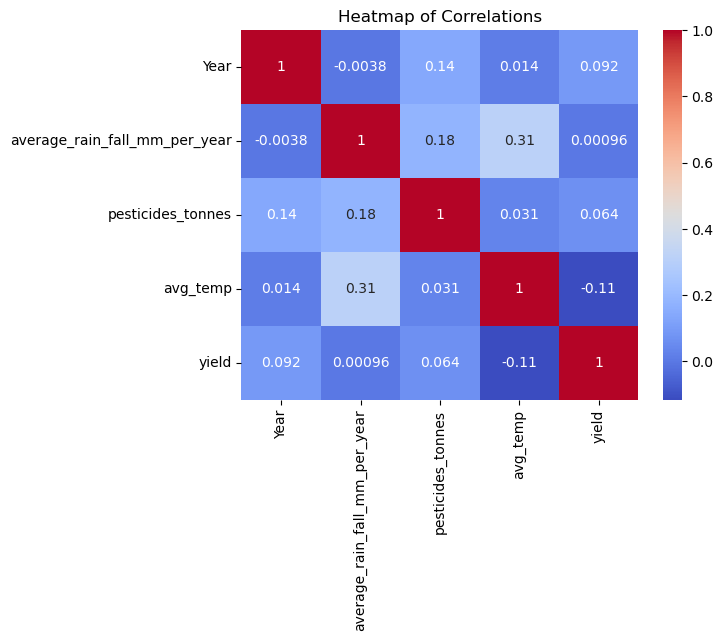

In [40]:
#check correlation b/w numeric features of the dataset
corr = df.corr(numeric_only = True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()

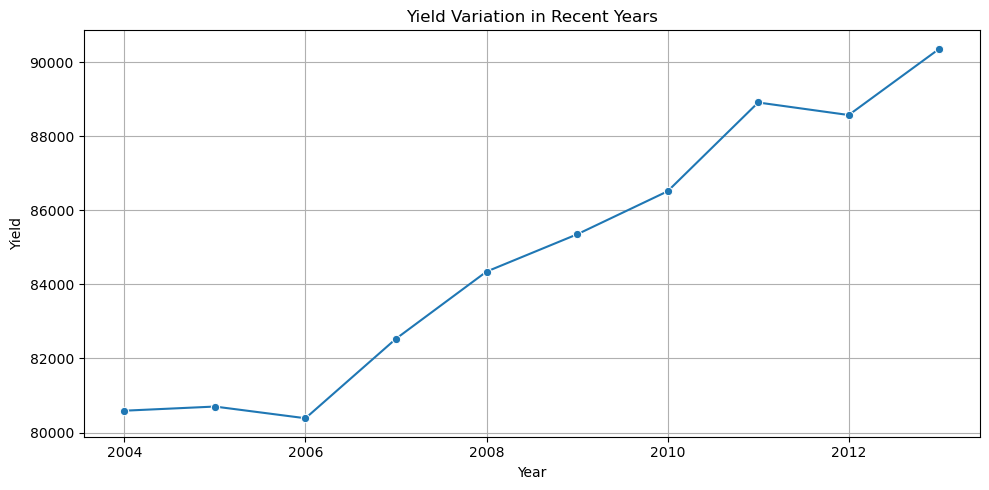

In [56]:
#observe yield variation in recent years
# Group by 'Year', compute mean yield, get top 5 years with highest yield
yield_recent_years = df.groupby('Year')['yield'].mean().sort_values(ascending=False).head(10)

# Sort the years for chronological plotting
yield_recent_years = yield_recent_years.sort_index()

# Plotting
plt.figure(figsize=(10, 5))
sns.lineplot(x=yield_recent_years.index, y=yield_recent_years.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Yield Variation in Recent Years')
plt.grid(True)
plt.tight_layout()
plt.show()


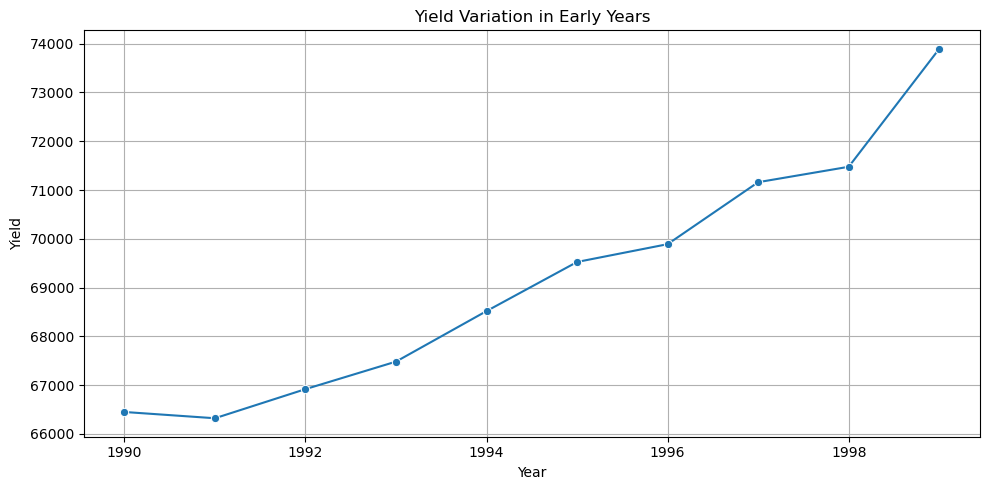

In [54]:
#observe yield variation in early years


# Group by 'Year', compute mean yield, get bottom 5 years with lowest yield
yield_early_years = df.groupby('Year')['yield'].mean().sort_values(ascending=True).head(10)

# Sort the years for chronological plotting
yield_early_years = yield_early_years.sort_index()

# Plotting
plt.figure(figsize=(10, 5))
sns.lineplot(x=yield_early_years.index, y=yield_early_years.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Yield Variation in Early Years')
plt.grid(True)
plt.tight_layout()
plt.show()


In [60]:
rainfall_yield_relation = df.groupby('average_rain_fall_mm_per_year')['yield'].mean().head(10)
rainfall_yield_relation

average_rain_fall_mm_per_year
51.0     114375.304348
56.0      65335.420290
59.0      82455.902174
74.0      86893.130435
83.0     153237.551724
89.0      58872.491228
92.0      27738.142857
151.0     76498.925466
207.0     53974.579710
216.0     39799.717391
Name: yield, dtype: float64

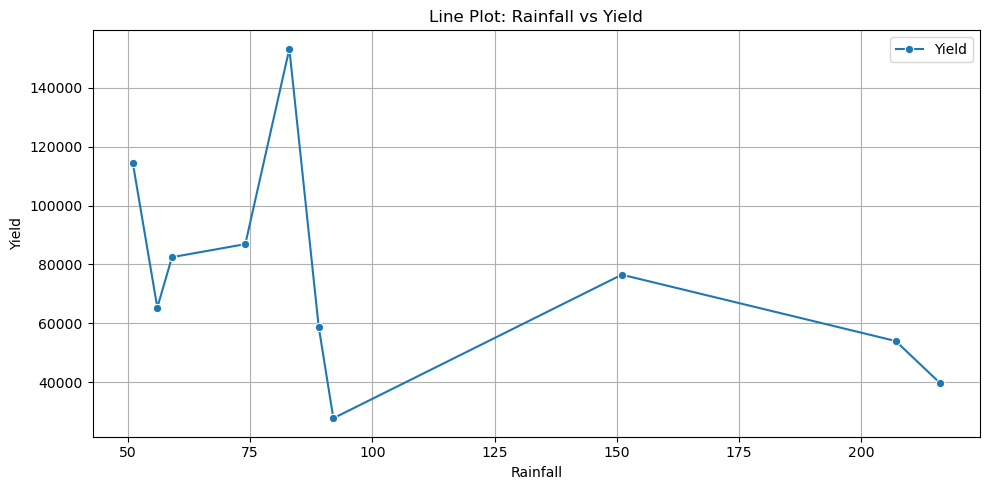

In [72]:
#observe relation b/w rainfall and yield via line plot

# Plotting
plt.figure(figsize=(10, 5))
sns.lineplot(x=rainfall_yield_relation.index, y=rainfall_yield_relation.values, marker='o', label='Yield')
plt.title('Line Plot: Rainfall vs Yield')
plt.xlabel('Rainfall')
plt.ylabel('Yield')
plt.grid(True)
plt.tight_layout()
plt.show()

In [74]:
df.head()

Area         Item  Year  average_rain_fall_mm_per_year  \
0  Albania        Maize  1990                         1485.0   
1  Albania     Potatoes  1990                         1485.0   
2  Albania  Rice, paddy  1990                         1485.0   
3  Albania      Sorghum  1990                         1485.0   
4  Albania     Soybeans  1990                         1485.0   

   pesticides_tonnes  avg_temp  yield  
0              121.0     16.37  36613  
1              121.0     16.37  66667  
2              121.0     16.37  23333  
3              121.0     16.37  12500  
4              121.0     16.37   7000

In [78]:
# Rename columns for clarity
df_new = df.rename(columns={
    "average_rain_fall_mm_per_year": "Rainfall",
    "pesticides_tonnes": "Pesticides",
    "avg_temp": "Avg_Temp"
})

In [80]:
df_new.head()

Area         Item  Year  Rainfall  Pesticides  Avg_Temp  yield
0  Albania        Maize  1990    1485.0       121.0     16.37  36613
1  Albania     Potatoes  1990    1485.0       121.0     16.37  66667
2  Albania  Rice, paddy  1990    1485.0       121.0     16.37  23333
3  Albania      Sorghum  1990    1485.0       121.0     16.37  12500
4  Albania     Soybeans  1990    1485.0       121.0     16.37   7000

In [82]:
# Encode categorical variables
#Making modification to account for cateogrical variables to better process in the alg
country = LabelEncoder()
crop = LabelEncoder()
df_new['Country_Encoded'] = country.fit_transform(df_new['Area'])
df_new['Crop_Encoded'] = crop.fit_transform(df_new['Item'])

In [84]:
# Define features and target variable
x = df_new[['Country_Encoded', 'Crop_Encoded', 'Pesticides', 'Avg_Temp', 'Rainfall']]
y = df_new['yield']

In [90]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [92]:
df_new.columns

Index(['Area', 'Item', 'Year', 'Rainfall', 'Pesticides', 'Avg_Temp', 'yield',
       'Country_Encoded', 'Crop_Encoded'],
      dtype='object')

In [94]:
print("Shapes of training data:")
print("X_train:", x_train.shape)
print("y_train:", y_train.shape)
print("\nShapes of testing data:")
print("X_test:", x_test.shape)
print("y_test:", y_test.shape)

Shapes of training data:
X_train: (22593, 5)
y_train: (22593,)

Shapes of testing data:
X_test: (5649, 5)
y_test: (5649,)


In [96]:
#Machine Learning algorithm
#Random Forest
treemodel = RandomForestRegressor(random_state=42)
treemodel.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [98]:
# Make predictions using the test features
y_pred = treemodel.predict(x_test)

In [100]:
#mean squared error
mean_squared_error(y_test,y_pred)

196175930.97252038

In [102]:
#mean absolute error
mean_absolute_error(y_test,y_pred)

5628.164972093607

In [104]:
#root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

14006.281839678952

In [106]:
# Calculate and print the R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

R-squared: 0.9729549486438772


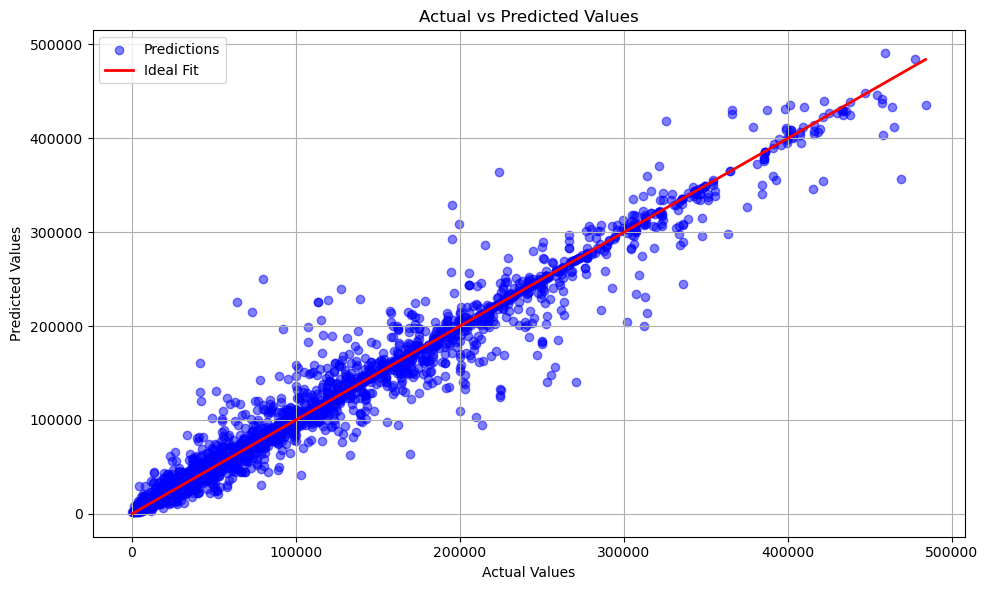

In [110]:
# Plot the actual vs predicted values

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [112]:
#Machine Learning algorithm
#Gradient Boosting Machine Learning method: LightGBM
train_data = lgb.Dataset(x_train,label=y_train)
test_data = lgb.Dataset(x_test,label=y_test)

In [114]:
#check the shapes of training and test
print("Shape of X_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (22593, 5)
Shape of y_train: (22593,)
Shape of X_test: (5649, 5)
Shape of y_test: (5649,)


In [116]:
#specifying paramters for LightGBM processing
parameters = {
'objective': 'regression',
'metric': 'mse',
'num_leaves':31,
'learning_rate':0.05,
'feature_fraction':0.9
}

In [118]:
#Performing LightGBM
lgbmodel = lgb.train(parameters,
train_data,
num_boost_round=1000,
valid_sets=[test_data],
callbacks=[lgb.early_stopping(stopping_rounds=10)])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 22593, number of used features: 5
[LightGBM] [Info] Start training from score 77051.197760
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 2.31978e+08


In [120]:
#do prediction
y_pred = lgbmodel.predict(x_test)

In [122]:
#mean squared error
mean_squared_error(y_test, y_pred)

231977657.88088742

In [124]:
#root mean squared error
np.sqrt(mean_squared_error(y_test, y_pred))

15230.812778078765

In [126]:
# Calculate and print the R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

R-squared: 0.9680192792267646


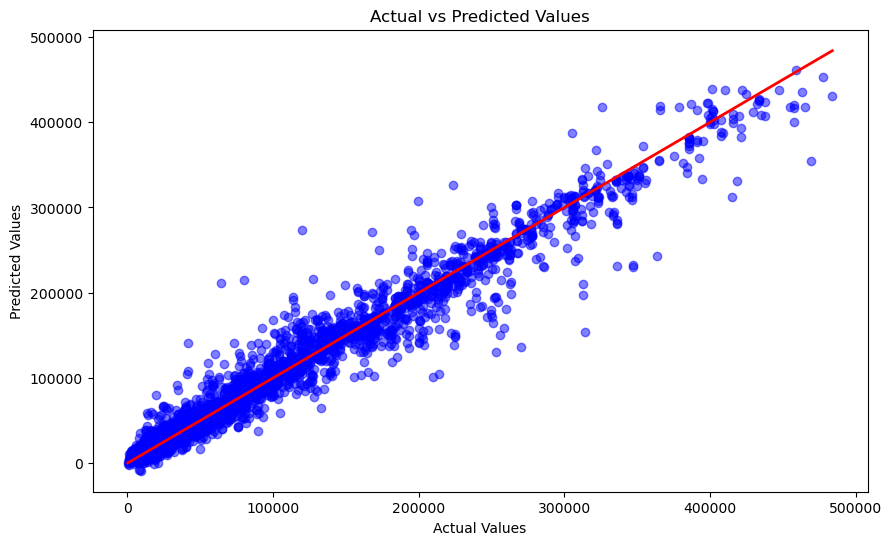

In [130]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red',  linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [132]:
# Split data into training and testing sets
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.2, random_state=42)

In [134]:
train_data2 = lgb.Dataset(x_train2,label=y_train2)
test_data2 = lgb.Dataset(x_test2,label=y_test2)

In [136]:
from sklearn.neighbors import KNeighborsRegressor


# Initialize the KNN Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)


In [144]:

# Fit the model on training data
knn_model.fit(x_train2, y_train2)


KNeighborsRegressor()

In [146]:

# Make predictions using the test features
y_predknn = knn_model.predict(x_test2)

In [150]:

# Evaluation metrics
mse = mean_squared_error(y_test2, y_predknn)
mae = mean_absolute_error(y_test2, y_predknn)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test2, y_predknn)


In [152]:

# Print evaluation results
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

Mean Squared Error: 4326997336.027353
Mean Absolute Error: 41644.42644715879
Root Mean Squared Error: 65779.91590164397
R-squared: 0.4034749085143441


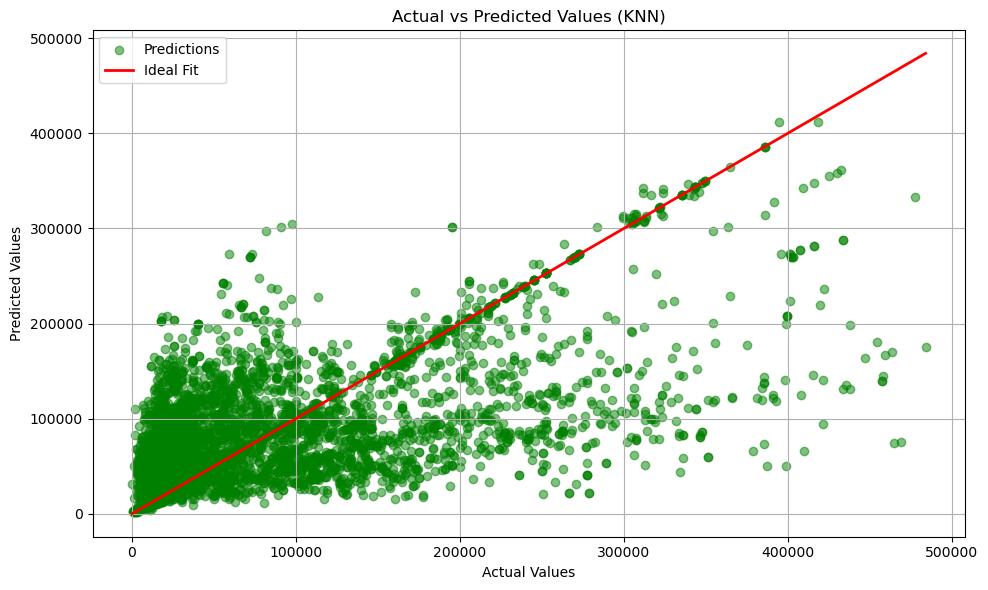

In [154]:


# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test2, y_predknn, color='green', alpha=0.5, label='Predictions')
plt.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (KNN)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()